In [ ]:
# Importing the Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Import Dataset

In [ ]:
# Load the Dataset in DataFrame using Pandas
df = pd.read_csv("/content/winequality-white.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Exploratory Data Analysis

In [ ]:
#Statictical obseravtions
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Finding the Null Values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Finding the Target values
df["quality"].value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:
# Displaying the Columns in the Dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#Dropping the Traget columnand unwanted columns and storing the remaining columns in X variable
X = df.drop(["quality"],axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
# Storing the Traget the value in Y-variable
y = df["quality"]
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

Data Visulaization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


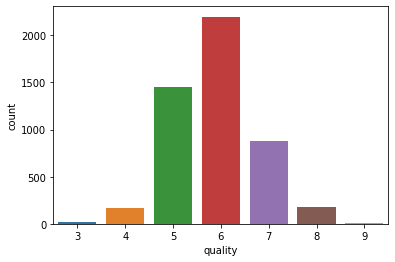

In [ ]:
# Graphical Representation of Target Value
sns.countplot(df["quality"])

Validation

In [ ]:
# Spliting the X and Y into Train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2,test_size= 0.3)

In [ ]:
# Shape of the Dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

In [ ]:
# Using DecisionTree model for Evaluation
model = DecisionTreeClassifier(max_depth = 100)
model.fit(X,y)

DecisionTreeClassifier(max_depth=100)

In [ ]:
pred = model.predict(X_test)
print(accuracy_score(pred,y_test))
print(classification_report(pred,y_test))
confusion_matrix(pred,y_test)

1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00       462
           6       1.00      1.00      1.00       653
           7       1.00      1.00      1.00       248
           8       1.00      1.00      1.00        51
           9       1.00      1.00      1.00         3

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



array([[  4,   0,   0,   0,   0,   0,   0],
       [  0,  49,   0,   0,   0,   0,   0],
       [  0,   0, 462,   0,   0,   0,   0],
       [  0,   0,   0, 653,   0,   0,   0],
       [  0,   0,   0,   0, 248,   0,   0],
       [  0,   0,   0,   0,   0,  51,   0],
       [  0,   0,   0,   0,   0,   0,   3]])

Cross_validation for DecisionTree

In [ ]:

score=cross_val_score(model,X,y,cv=10)
print("Cross Validation Scores are {}:".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Cross Validation Scores are [0.4        0.43673469 0.35918367 0.36734694 0.3877551  0.40204082
 0.40816327 0.46938776 0.42944785 0.39672802]:
Average Cross Validation score :0.4056788114018614


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


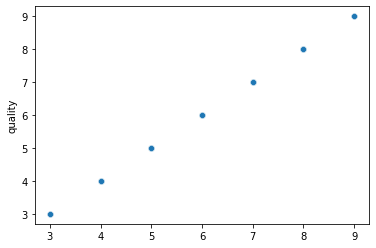

In [ ]:
# Graph of Output values
sns.scatterplot(pred,y_test)


In [ ]:
clf = RandomForestClassifier(max_depth=20)
clf.fit(X_train,y_train)
predicts = clf.predict(X_test)
print(accuracy_score(predicts,y_test))
print(classification_report(predicts,y_test))
confusion_matrix(predicts,y_test)

0.6537414965986394
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.16      0.67      0.26        12
           5       0.66      0.70      0.68       436
           6       0.78      0.62      0.69       830
           7       0.49      0.70      0.57       174
           8       0.31      0.89      0.46        18
           9       0.00      0.00      0.00         0

    accuracy                           0.65      1470
   macro avg       0.34      0.51      0.38      1470
weighted avg       0.70      0.65      0.67      1470



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   8,   3,   1,   0,   0,   0],
       [  3,  22, 304, 102,   4,   1,   0],
       [  1,  18, 153, 512, 122,  23,   1],
       [  0,   1,   2,  37, 121,  11,   2],
       [  0,   0,   0,   1,   1,  16,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [ ]:
scores=cross_val_score(clf,X,y,cv=3)
print("Cross Validation Scores are {}:".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Cross Validation Scores are [0.49724434 0.54990814 0.51348039]:
Average Cross Validation score :0.5202109574182806


In [ ]:
model_1 = svm.SVC(kernel ="linear", C = 20)
model_1.fit(X_train,y_train)
prediction = model_1.predict(X_test)
print(accuracy_score(prediction,y_test))
print(classification_report(prediction,y_test))
print(confusion_matrix(prediction,y_test))

0.5319727891156463
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.52      0.61      0.56       394
           6       0.81      0.50      0.62      1058
           7       0.05      0.67      0.09        18
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.53      1470
   macro avg       0.20      0.25      0.18      1470
weighted avg       0.72      0.53      0.60      1470

[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  2  23 239 118  11   1   0]
 [  2  26 223 531 225  48   3]
 [  0   0   0   4  12   2   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score_1=cross_val_score(model_1,X,y,cv=3)
print("Cross Validation Scores are {}:".format(score_1))
print("Average Cross Validation score :{}".format(score_1.mean()))

Cross Validation Scores are [0.48193509 0.54194734 0.52083333]:
Average Cross Validation score :0.5149052527726746


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
std = MinMaxScaler()
Std =std.fit_transform(X)

In [ ]:
# Spliting the X and Y into Train and test 
X_train,X_test,y_train,y_test = train_test_split(Std,y,random_state = 2,test_size= 0.3)

In [ ]:
from numpy.lib.function_base import append
estimators = [('pca', PCA(n_components= 10)), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe.fit(X_train,y_train)
model_3 = pipe.predict(X_test)
print(accuracy_score(model_3,y_test))
print(classification_report(model_3,y_test))
print(confusion_matrix(model_3,y_test))

0.5612244897959183
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.06      0.50      0.11         6
           5       0.54      0.63      0.58       398
           6       0.77      0.53      0.63       947
           7       0.27      0.57      0.37       119
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.56      1470
   macro avg       0.24      0.32      0.24      1470
weighted avg       0.67      0.56      0.59      1470

[[  0   0   0   0   0   0   0]
 [  0   3   2   1   0   0   0]
 [  2  21 250 117   7   1   0]
 [  2  24 208 504 173  35   1]
 [  0   1   2  31  68  15   2]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from numpy.lib.function_base import append
estimators_1 = [('pca', PCA(n_components= 10)), ('CLF', LogisticRegression())]
pipe_1 = Pipeline(estimators_1)
pipe_1.fit(X_train,y_train)
model_4 = pipe_1.predict(X_test)
print(accuracy_score(model_4,y_test))
print(classification_report(model_4,y_test))
print(confusion_matrix(model_4,y_test))

0.5285714285714286
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.48      0.60      0.54       372
           6       0.77      0.50      0.61       997
           7       0.20      0.50      0.29       101
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.53      1470
   macro avg       0.21      0.23      0.20      1470
weighted avg       0.66      0.53      0.57      1470

[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  2  21 224 112  12   1   0]
 [  2  27 238 503 186  41   0]
 [  0   1   0  38  50   9   3]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
